# Flower Species Classifcation

This famous dataset demonstrates classifying the species of an Iris flower based on measurements of the flower such as the length and width of the petal and sepal.

The input features are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

The target feature is the species of the flower, of which there are three classes:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

One class is linearly separable from the other 2, the other classses are not linearly separable.

Sources and further learning:
* http://archive.ics.uci.edu/ml/datasets/iris
* https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset
* https://www.kaggle.com/uciml/iris

<p><a href="https://commons.wikimedia.org/wiki/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg#/media/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/1200px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" alt="Iris germanica (Purple bearded Iris), Wakehurst Place, UK - Diliff.jpg" width="300" height="300"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Diliff" title="User:Diliff">Diliff</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=33037509">Link</a></p>


In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import matplotlib.colors
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.metrics
import sklearn.linear_model
import sklearn.neighbors
%matplotlib inline

In [2]:
# some constants
num_classes = 3
input_features = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']
target_feature = 'species'

In [3]:
# This data is also available through scikit-learn example datasets by calling the funcation sklearn.datasets.load_iris()
flowers_df_raw = pandas.read_csv('./Data/flowers.csv', names=(input_features + [target_feature]))
species_names = list(flowers_df_raw.species.unique())

### Data exploration

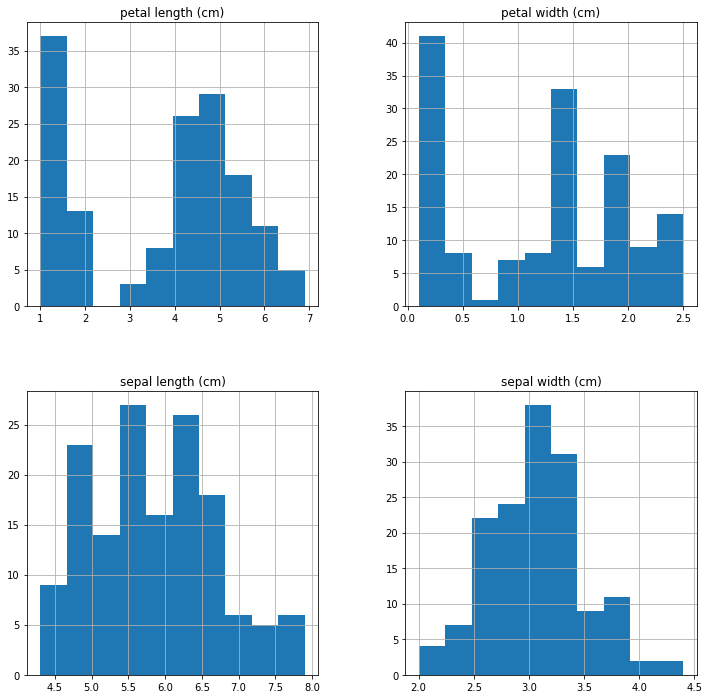

In [4]:
_ = flowers_df_raw[input_features[:4]].hist(figsize=(12,12))

<BarContainer object of 3 artists>

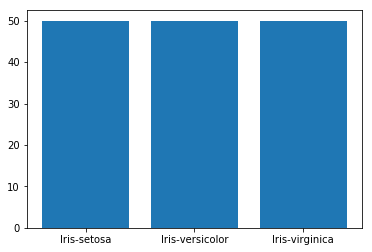

In [5]:
fig1 = matplotlib.pyplot.figure('species_dist')
ax1 = fig1.add_subplot(111)
ax1.bar(list(flowers_df_raw.species.unique()), (flowers_df_raw.species.value_counts().values))

### Data preprocessing

In [6]:
species_encoder = sklearn.preprocessing.LabelEncoder()
species_encoder.fit(flowers_df_raw.species)
species_encoded = pandas.DataFrame(species_encoder.transform(flowers_df_raw.species), columns=[target_feature])


input_normaliser = sklearn.preprocessing.StandardScaler()
input_normaliser.fit(flowers_df_raw[input_features])
inputs_scaled = pandas.DataFrame(input_normaliser.transform(flowers_df_raw[input_features]),columns=input_features)

flowers_df_ml = pandas.concat([inputs_scaled, species_encoded],axis=1)

In [7]:
flowers_df_raw

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
(X_train, X_test,
 y_train, y_test) = sklearn.model_selection.train_test_split(
    flowers_df_ml[input_features], flowers_df_ml[target_feature], test_size=0.2)


### Dimensionality reduction and visualisation

It is important to understand your data. Visualisation is the easiest to develop some intuition about a dataset but most datasets will have more that 2 features, and so cannot immediately be visualised. Dimensionality reduction techniques aim to present as much of the information as possible with fewer features, exploiting correlations in the data. Using an aglorithm like PCA, the first 2 dimensions have the most information in them, so we can visualise those and see how separable the classes might be.

In [9]:
dim_red_pca = sklearn.decomposition.PCA(n_components=2)
dim_red_pca.fit(flowers_df_ml[input_features])
input_vis = dim_red_pca.transform(flowers_df_ml[input_features])

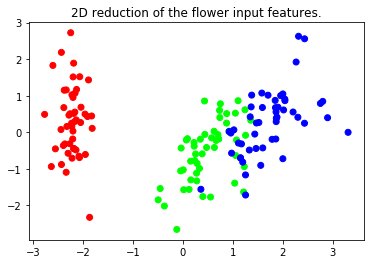

In [10]:
fig_pca = matplotlib.pyplot.figure('dimension_reduction')
ax_pca = fig_pca.add_subplot(111,title='2D reduction of the flower input features.')
_= ax_pca.scatter(input_vis[:,0],input_vis[:,1],c=list(flowers_df_ml[target_feature]),cmap=matplotlib.colors.ListedColormap(['#FF0000','#00FF00','#0000FF']))

### Linear Classification
 Start by applying linear classifiers. Our PCA has shown that the classes are not all linearly separable, but we can find a baseline for accuracy. More complex algorithms must be better than a simple linear one to be worth the effort!

In [11]:
clf_lin_svc = sklearn.svm.LinearSVC()
clf_lin_svc.fit(X_train, y_train)
y_res_train_svc = clf_lin_svc.predict(X_train)
df_res_train_svc = pandas.concat([X_train, pandas.DataFrame(y_res_train_svc,columns=[target_feature])],axis=1)
y_res_test_svc = clf_lin_svc.predict(X_test)
df_res_test_svc = pandas.concat([X_test, pandas.DataFrame(y_res_test_svc,columns=[target_feature])],axis=1)
score_f1_train = sklearn.metrics.f1_score(y_train,y_res_train_svc,average=None)
score_f1_test = sklearn.metrics.f1_score(y_test,y_res_test_svc,average=None)

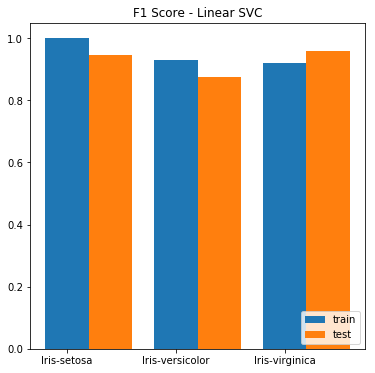

In [12]:
fig_svc_f1 = matplotlib.pyplot.figure('results_svc_f1',figsize=(6,6))
ax_svc_f1 = fig_svc_f1.add_subplot(111,title='F1 Score - Linear SVC')
bar_width = 0.4
bar_pos_train = numpy.arange(0,num_classes)
_ = ax_svc_f1.bar(bar_pos_train, score_f1_train, label='train',width=bar_width)
bar_pos_test = [x1 + bar_width for x1 in bar_pos_train]
_ = ax_svc_f1.bar(bar_pos_test, score_f1_test, label='test',width=bar_width)
_ = ax_svc_f1.legend(loc=4)
_ = ax_svc_f1.set_xticks(bar_pos_train)
_ = ax_svc_f1.set_xticklabels(species_names)

In [13]:
clf_logreg = sklearn.linear_model.LogisticRegression()
clf_logreg.fit(X_train, y_train)
y_res_train_logreg = clf_logreg.predict(X_train)
df_res_train_logreg = pandas.concat([X_train, pandas.DataFrame(y_res_train_logreg,columns=[target_feature])],axis=1)
y_res_test_logreg = clf_logreg.predict(X_test)
df_res_test_logreg = pandas.concat([X_test, pandas.DataFrame(y_res_test_logreg,columns=[target_feature])],axis=1)
score_f1_train_logreg = sklearn.metrics.f1_score(y_train,y_res_train_logreg,average=None)
score_f1_test_logreg = sklearn.metrics.f1_score(y_test,y_res_test_logreg,average=None)

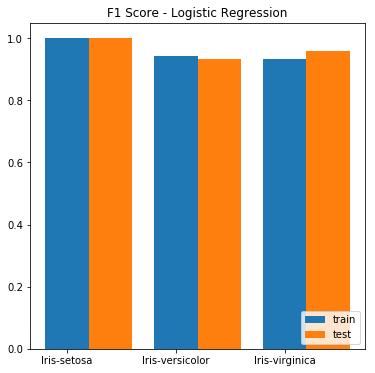

In [14]:
fig_logreg_f1 = matplotlib.pyplot.figure('results_logreg_f1',figsize=(6,6))
ax_logreg_f1 = fig_logreg_f1.add_subplot(111,title='F1 Score - Logistic Regression')
_ = ax_logreg_f1.bar(bar_pos_train, score_f1_train_logreg, label='train',width=bar_width)
_ = ax_logreg_f1.bar(bar_pos_test, score_f1_test_logreg, label='test',width=bar_width)
_ = ax_logreg_f1.legend(loc=4)
_ = ax_logreg_f1.set_xticks(bar_pos_train)
_ = ax_logreg_f1.set_xticklabels(species_names)

### Nearest Neighbour


adasdasd


In [15]:
clf_nn5 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
clf_nn5.fit(X_train, y_train)
y_res_train_nn5 = clf_nn5.predict(X_train)
df_res_train_nn5 = pandas.concat([X_train, pandas.DataFrame(y_res_train_nn5,columns=[target_feature])],axis=1)
y_res_test_nn5 = clf_nn5.predict(X_test)
df_res_test_nn5 = pandas.concat([X_test, pandas.DataFrame(y_res_test_nn5,columns=[target_feature])],axis=1)
score_f1_train_nn5 = sklearn.metrics.f1_score(y_train,y_res_train_nn5,average=None)
score_f1_test_nn5 = sklearn.metrics.f1_score(y_test,y_res_test_nn5,average=None)

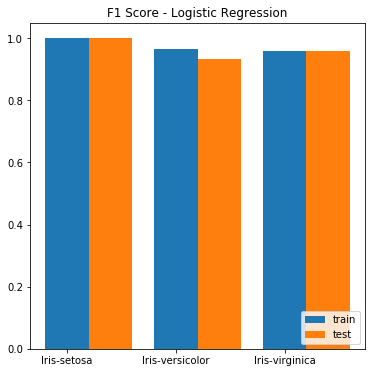

In [16]:
fig_nn5_f1 = matplotlib.pyplot.figure('results_nn5_f1',figsize=(6,6))
ax_nn5_f1 = fig_nn5_f1.add_subplot(111,title='F1 Score - Logistic Regression')
_ = ax_nn5_f1.bar(bar_pos_train, score_f1_train_nn5, label='train',width=bar_width)
_ = ax_nn5_f1.bar(bar_pos_test, score_f1_test_nn5, label='test',width=bar_width)
_ = ax_nn5_f1.legend(loc=4)
_ = ax_nn5_f1.set_xticks(bar_pos_train)
_ = ax_nn5_f1.set_xticklabels(species_names)

### Decision trees

### Meauring sucess: metrics

### Hyperparameter tuning